Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) . Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

1. k-means clustering using scikit learn package **(50 points)**

2. reading the review articles

3. caluculate the sum of least square error for each different valus of k

4. using Matplotlib determine the optimal number of clusters (k) using elbow method along with a brief explanation **(50 points)**

5. plot the optimal clusters with their centroids along with brief explanation **(50 points)**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('diabetic_data.csv', usecols = ["race", "diag_1","diag_2","diag_3", "insulin","readmitted"])

# data cleaning

# change all data type (to remove all string) in diag results  to float --> the string will be replaced with nan 
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')
df['diag_2'] = pd.to_numeric(df['diag_2'], errors='coerce')
df['diag_3'] = pd.to_numeric(df['diag_3'], errors='coerce')

# print(df.isna().sum()) check nan in each column

# replace nan with skip-nan mean value (nan occur almost half of the list so I decided to exclude the nan list to N)
mean_diag1 = np.nanmean(df['diag_1'])
mean_diag2 = np.nanmean(df['diag_2'])
mean_diag3 = np.nanmean(df['diag_3'])

# fill nan with mean in diag result because there is more than half missing values 
df['diag_1'].fillna(mean_diag1, inplace= True)
df['diag_2'].fillna(mean_diag2, inplace= True)
df['diag_3'].fillna(mean_diag3, inplace= True)


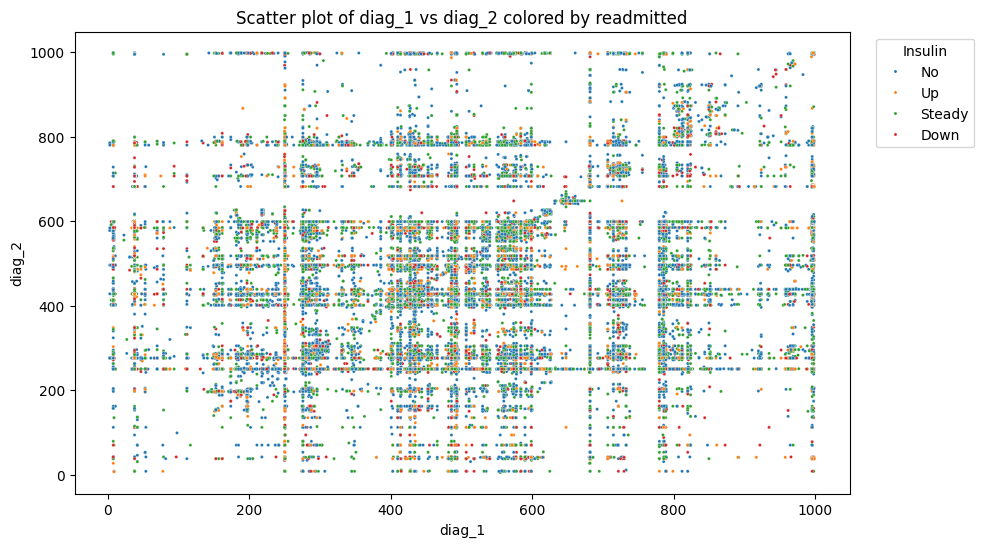

In [ ]:
# Create a scatter plot with seaborn to see the overall collected data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diag_1', y='diag_2', data=df, hue='insulin', s=5)
plt.legend(title='Insulin', loc='upper right', bbox_to_anchor=(1.17, 1))
plt.xlabel('diag_1')
plt.ylabel('diag_2')
plt.title('Scatter plot of diag_1 vs diag_2 colored by readmitted')
plt.show()

# K-means caluculation

### Normalization

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Splitting the data set 
X_train, X_test, y_train, y_test = train_test_split(df[['diag_1', 'diag_2']], df[['insulin']], test_size=0.33, random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, n_init=10, random_state=0)

[]

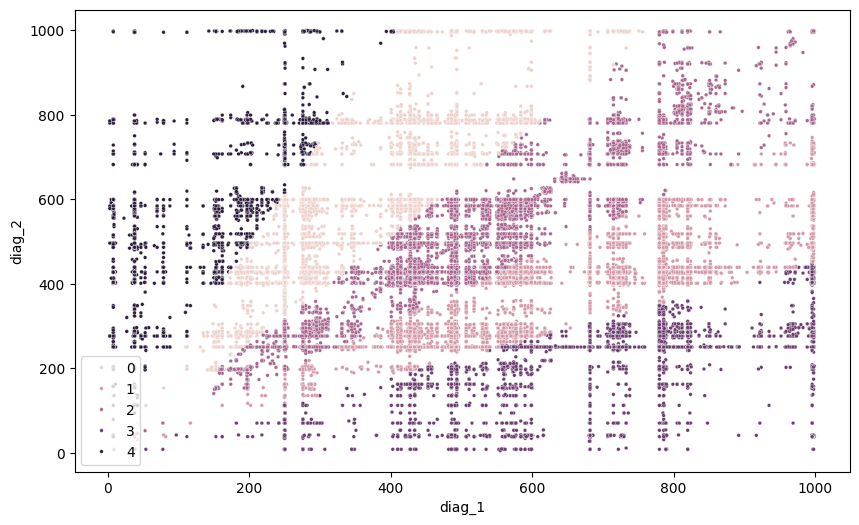

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'diag_1', y = 'diag_2', hue = kmeans.labels_, s= 7)
plt.plot()

In [6]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.6117084153469525

# Choose cluster number from elbow plots

In [7]:
K = range(2, 15)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

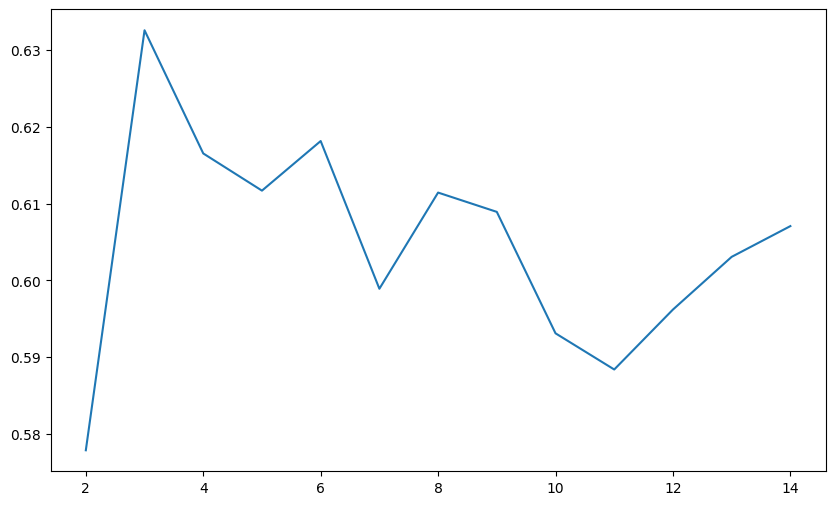

In [ ]:
# Elbow plot to decide the suitable group for clustering
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

# After elbow plot, I implemented 5,7 and 11 cluster and I chose 5 because it is rather better in scatter anad box plot.
# Although five is the first elbow point, when the 

## 5 Clusters in scatter and box plot

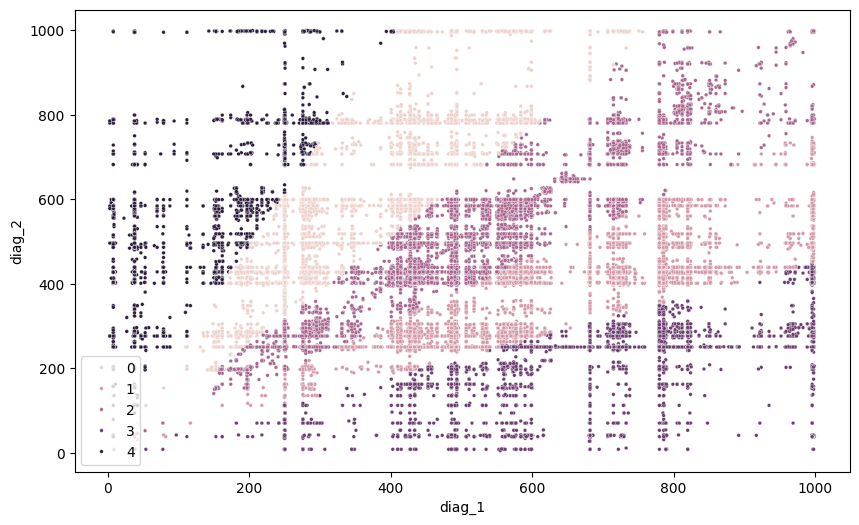

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'diag_1', y = 'diag_2', hue = fits[3].labels_, s =7)
plt.show()

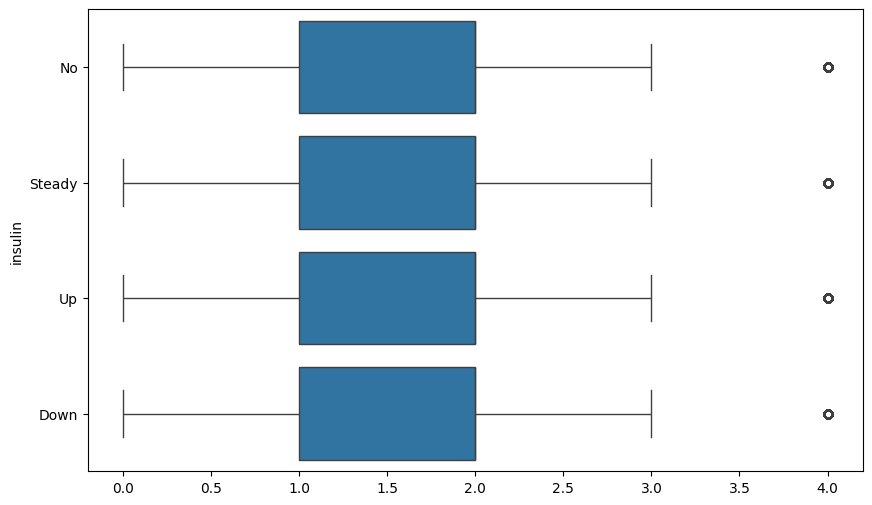

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = fits[3].labels_, y = y_train['insulin'])
plt.show()

# the mean of box plot is quite unity and the scatter plot is divided into 5 groups like a diagonal line.

## 7 Clusters on scatter and box plot

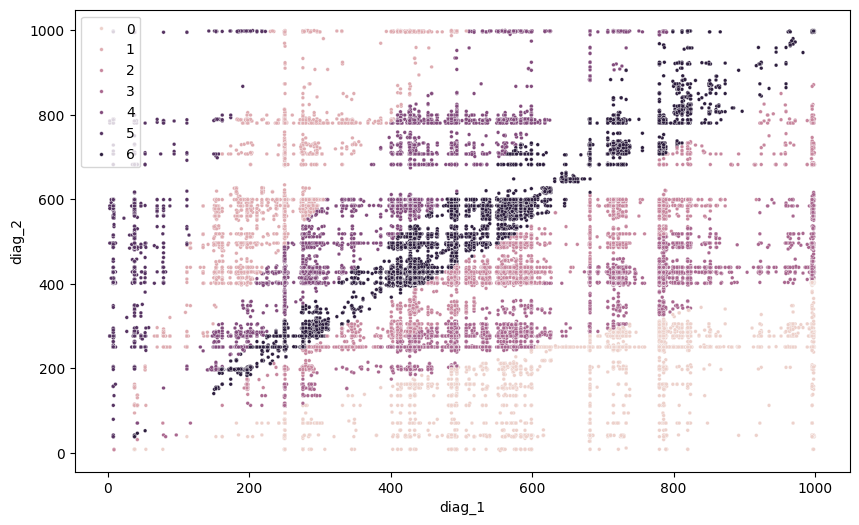

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'diag_1', y = 'diag_2', hue = fits[5].labels_, s=7)
plt.show()

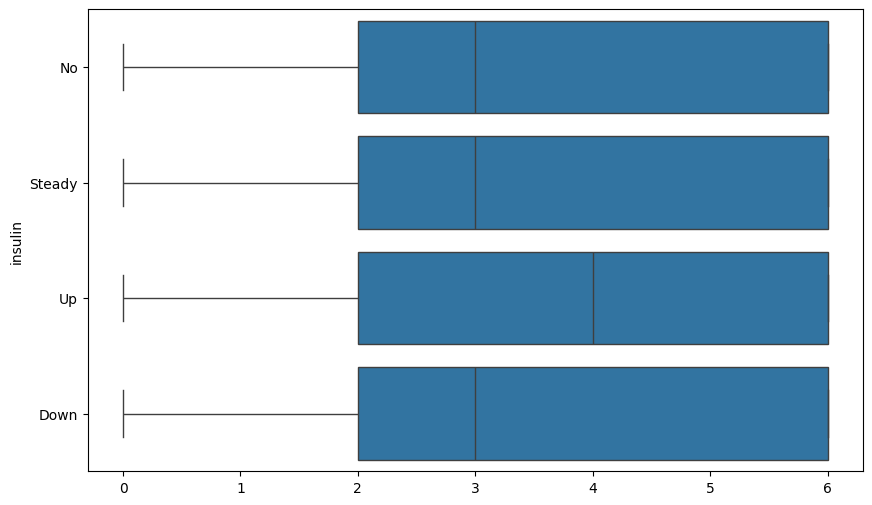

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = fits[5].labels_, y = y_train['insulin'])
plt.show()

## 11 Clusters in scatter and box plot

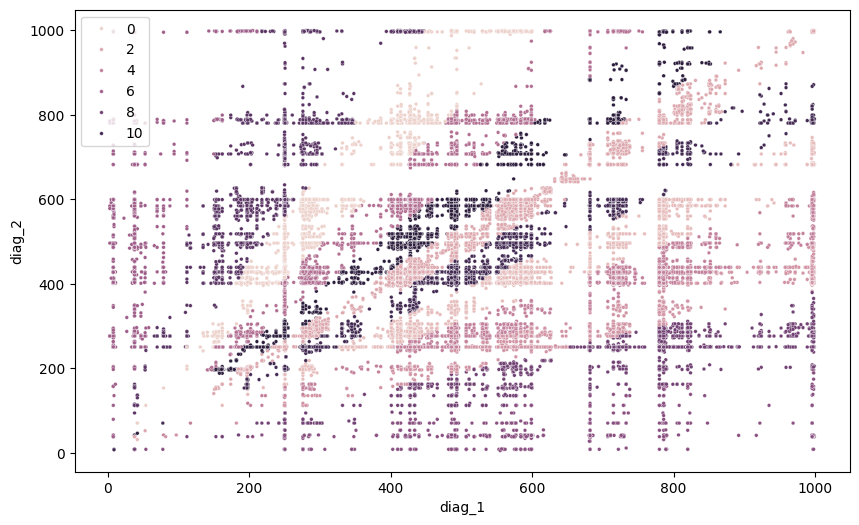

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'diag_1', y = 'diag_2', hue = fits[10].labels_, s=7)
plt.show()

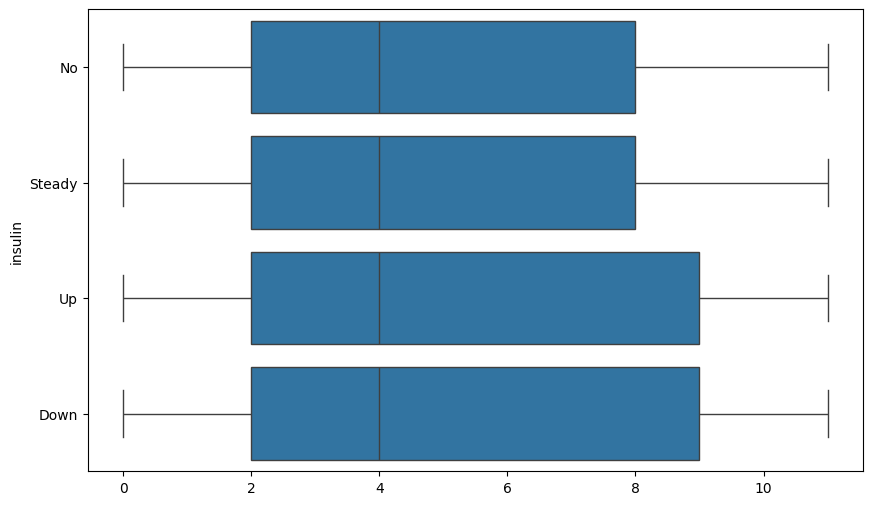

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = fits[10].labels_, y = y_train['insulin'])
plt.show()